In [13]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
from statistics import mean 
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('College_Sleep_Study.csv')
#remove outliers
df.replace('?', -99999, inplace = True)

In [15]:
#drop categorical features that already have a numeric represenation
df = df.drop(['DepressionStatus', 'AnxietyStatus'],1)
#dop correlated features
df = df.drop(['DepressionScore','AnxietyScore','DASScore'],1)
print(df)

     Gender  ClassYear  LarkOwl  NumEarlyClass  EarlyClass   GPA  \
0         0          4  Neither              0           0  3.60   
1         0          4  Neither              2           1  3.24   
2         0          4      Owl              0           0  2.97   
3         0          1     Lark              5           1  3.76   
4         0          4      Owl              0           0  3.20   
5         1          4  Neither              0           0  3.50   
6         1          2     Lark              2           1  3.35   
7         0          2     Lark              0           0  3.00   
8         0          1  Neither              2           1  4.00   
9         0          4  Neither              2           1  2.90   
10        1          2  Neither              1           1  3.70   
11        1          2  Neither              0           0  3.00   
12        0          1  Neither              4           1  3.30   
13        1          3  Neither              2  

In [16]:
#Correlation with output variable
cor_target = abs(cor["GPA"])
#select scores
relevant_features = cor_target[cor_target>0.09]
relevant_features

NameError: name 'cor' is not defined

In [63]:
#only keep the features with correlations >= 0.1 with gpa
newdf = df[['Gender','ClassYear','GPA','ClassesMissed','CognitionZscore','StressScore','WeekdayBed',     
'WeekdayRise','WeekendBed','WeekendRise']]

In [8]:
plt.figure(figsize=(20,20))
cor = newdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

NameError: name 'newdf' is not defined

<Figure size 1440x1440 with 0 Axes>

In [65]:
#some algorithm require a categorical target feature while others accept a continuous value.
#make 2 df one with a categorical feature and one with a continuous value.
#loop through gpa to convert it to categorical
for i in range(0,253):
    if (newdf.at[i,'GPA'] >= 0.0) & (newdf.at[i,'GPA'] < 1.0):
       newdf.set_value(i, "GPA", int(0))
    elif (newdf.at[i,'GPA'] >= 1.0) & (newdf.at[i,'GPA'] <2.0):
        newdf.set_value(i, "GPA", int(1))
    elif (newdf.at[i,'GPA'] >= 2.0) & (newdf.at[i,'GPA'] <3.0):
        newdf.set_value(i, "GPA", int(2))
    else:
        newdf.set_value(i, "GPA", int(3))

C:\Users\Chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\Chase\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [66]:
#all fields must be numerical remove non numerical features and target feature
#string type LarkOwl, AlcoholUse, DepressionStatus, AnxietyStatus, Stress
x = np.array(newdf.drop(['GPA'],1))
#df of only target feature
y = np.array(newdf['GPA'])

In [67]:
''''Want to write a for loop here that will iterate through train_test_split, build models and get accuracy x times.
Save the accuracies to arrays so we can get the average accuracy for each model'''
clf1acc = []
clf2acc = []
clf3acc = []

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)
    
    clf1 = neighbors.KNeighborsClassifier(25)
    clf1.fit(x_train, y_train)
    accuracy = clf1.score(x_test, y_test)
    clf1acc.append(accuracy)

    clf2 = DecisionTreeClassifier()
    clf2.fit(x_train, y_train)
    accuracy = clf2.score(x_test, y_test)
    clf2acc.append(accuracy)
    
    #Support Vector Classifier
    clf3 = SVC(gamma='auto')
    clf3.fit(x_train, y_train)
    accuracy = clf3.score(x_test, y_test)
    clf3acc.append(accuracy)
    
print('K Nearest Neighbors Training Average Accuracy: ', mean(clf1acc))
print('Decision Tree Classifier Average Accuracy: ', mean(clf2acc))
print('Support Vector Classifier Average Accuracy: ', mean(clf3acc))


K Nearest Neighbors Training Average Accuracy:  0.7918627450980392
Decision Tree Classifier Average Accuracy:  0.6856862745098039
Support Vector Classifier Average Accuracy:  0.7926470588235294


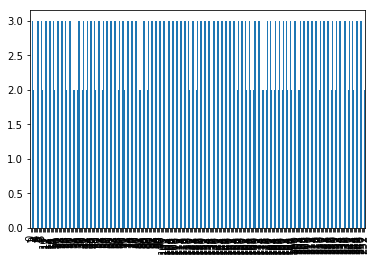

In [69]:
plt.figuresize=(100,100)
newdf['GPA'].plot.bar()

In [ ]:
'''
function calls for other algorithms!


clf = svm.SVR()
clf.fit(trainingData, trainingScores)
print("SVR")
print(clf.predict(predictionData))

clf = LogisticRegression()
clf.fit(trainingData, trainingScores)
print("LogisticRegression")
print(clf.predict(predictionData))


clf = LinearDiscriminantAnalysis()
clf.fit(trainingData, trainingScores)
print("LinearDiscriminantAnalysis")
print(clf.predict(predictionData))

clf = GaussianNB()
clf.fit(trainingData, trainingScores)
print("GaussianNB")
print(clf.predict(predictionData))

clf = SVC()
clf.fit(trainingData, trainingScores)
print("SVC")
print(clf.predict(predictionData))'''